COVID 19 Dataset:

This is a dataset I downloaded due to its large number of realisations, real world relevance and variety of categorical and quantitative columns. First, here is the code I downloaded with comments from me.

In [1]:
import os

import pandas as pd
import numpy as np


from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt

init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv('owid-covid-data.csv')

Here, I'm going to add some code to present the data format and headers.

In [3]:
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
5,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
6,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
7,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
8,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
9,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [4]:
df['death_rate'] = (df['new_deaths_smoothed_per_million'] / df['new_cases_smoothed_per_million']).replace(np.inf,np.nan)
df['population_coverage'] = df['total_tests'] / df['population']
df['datetime'] = pd.to_datetime(df['date'])

In [5]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
total_cases,44182.0,93721.529039,0.0,53.0,937.0,9989.0,30540446.0,970700.37478
new_cases,43982.0,1388.770224,-8261.0,0.0,9.0,156.0,313658.0,12665.458657
new_cases_smoothed,43200.0,1372.258368,-552.0,0.571,14.143,160.857,288630.0,12420.794948
total_deaths,44182.0,3885.163189,0.0,0.0,17.0,213.0,952724.0,36227.966483
new_deaths,43982.0,43.32336,-1918.0,0.0,0.0,3.0,10491.0,366.554434
new_deaths_smoothed,43200.0,43.329499,-232.143,0.0,0.143,3.0,7456.714,356.193423
total_cases_per_million,43918.0,1778.176471,0.0,25.37375,266.509,1793.0125,42663.811,3814.416468
new_cases_per_million,43918.0,23.57385,-2212.545,0.0,1.4755,16.5515,4944.376,72.289186
new_cases_smoothed_per_million,43135.0,23.160618,-269.978,0.123,2.838,18.2005,882.924,55.613758
total_deaths_per_million,43918.0,55.32041,0.0,0.0,4.566,33.61675,1237.551,140.662359


### Some columns are surprisingly negative, let's filter them

In [6]:
problem_idx = df[(df['new_cases']<0)|(df['new_deaths']<0)|(df['new_cases_smoothed']<0)|(df['new_deaths_smoothed']<0)|(df['new_cases_per_million']<0)|(df['new_deaths_per_million']<0)
                 |(df['new_deaths_smoothed_per_million']<0)|(df['new_tests']<0)|(df['new_tests_per_thousand']<0)|(df['location'].isin(['World']))].index

In [7]:
df = df[~df.index.isin(problem_idx)]
df = df[~df['date'].isin(['2020-09-18', '2020-09-19'])].reset_index(drop=True)

### New Cases, Tests, Deaths and positive rate over all countries

In [8]:
trace1 = go.Scatter(
    x=df.groupby(['date'])['date'].apply(lambda x: np.unique(x)[0]),
    y=df.groupby(['date'])['new_tests_smoothed'].sum().astype(int),
        xaxis='x2',
    yaxis='y2',
    name = "new tests smoothed"
)
trace2 = go.Scatter(
    x=df.groupby(['date'])['date'].apply(lambda x: np.unique(x)[0]),
    y=df.groupby(['date'])['new_deaths_smoothed'].sum().astype(int),
    name = "new deaths smoothed"
)
trace3 = go.Scatter(
    x=df.groupby(['date'])['date'].apply(lambda x: np.unique(x)[0]),
    y=(df.groupby(['date'])['positive_rate'].mean() * 100).round(3),
    xaxis='x3',
    yaxis='y3',
    name = "test positive rate %"
)
trace4 = go.Scatter(
    x=df.groupby(['date'])['date'].apply(lambda x: np.unique(x)[0]),
    y=df.groupby(['date'])['new_cases_smoothed'].sum().astype(int),
    xaxis='x4',
    yaxis='y4',
    name = "new cases smoothed"
)

data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
    ),
    yaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1]
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'New tests, deaths, cases and test positive rate'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [9]:
trace1 = go.Scatter(
    x=df.groupby(['date'])['date'].apply(lambda x: np.unique(x)[0]),
    y=df.groupby(['date'])['new_deaths_smoothed_per_million'].mean(),
        xaxis='x2',
    yaxis='y2',
    name = "mean new deaths smoothed per million"
)
trace2 = go.Scatter(
    x=df.groupby(['date'])['date'].apply(lambda x: np.unique(x)[0]),
    y=df.groupby(['date'])['new_tests_smoothed_per_thousand'].mean(),
    name = "mean new tests smoothed per thousand"
)
trace3 = go.Scatter(
    x=df.groupby(['date'])['date'].apply(lambda x: np.unique(x)[0]),
    y=(df.groupby(['date'])['death_rate'].mean().replace([np.inf],np.nan).interpolate(method='linear', limit_direction='forward', axis=0) * 100).round(3),
    xaxis='x3',
    yaxis='y3',
    name = "interpolated death rate %"
)
trace4 = go.Scatter(
    x=df.groupby(['date'])['date'].apply(lambda x: np.unique(x)[0]),
    y=((df.groupby(['date'])['new_cases_per_million'].apply(lambda x: np.mean(x/1e+6))) * 100).round(6),
    xaxis='x4',
    yaxis='y4',
    name = "mean covid population d2d coverage %"
)

data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
    ),
    yaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1]
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'Mean new deaths per 1M, new tests per 1K, death rate and covid mean coverage'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

### New Deaths Smoothed

In [10]:
trace1 = go.Scatter(
                    x = df[(df['continent']=='Asia')].groupby(['date','continent'])['date'].apply(lambda x: np.unique(x)[0]),
                    y = df[(df['continent']=='Asia')].groupby(['date','continent'])['new_deaths_smoothed'].sum(),
                    mode = "lines",
                    name = "Asia",
                    marker = dict(color = 'green'),
)

trace2 = go.Scatter(
                    x = df[(df['continent']=='Europe')].groupby(['date','continent'])['date'].apply(lambda x: np.unique(x)[0]),
                    y = df[(df['continent']=='Europe')].groupby(['date','continent'])['new_deaths_smoothed'].sum(),
                    mode = "lines",
                    name = "Europe",
                    marker = dict(color = 'red'),
)

trace3 = go.Scatter(
                    x = df[(df['continent']=='Africa')].groupby(['date','continent'])['date'].apply(lambda x: np.unique(x)[0]),
                    y = df[(df['continent']=='Africa')].groupby(['date','continent'])['new_deaths_smoothed'].sum(),
                    mode = "lines",
                    name = "Africa",
                    marker = dict(color = 'blue'),
                    #text= df.university_name
)

trace4 = go.Scatter(
                    x = df[(df['continent']=='North America')].groupby(['date','continent'])['date'].apply(lambda x: np.unique(x)[0]),
                    y = df[(df['continent']=='North America')].groupby(['date','continent'])['new_deaths_smoothed'].sum(),
                    mode = "lines",
                    name = "North America",
                    marker = dict(color = 'black'),
)

trace5 = go.Scatter(
                    x = df[(df['continent']=='South America')].groupby(['date','continent'])['date'].apply(lambda x: np.unique(x)[0]),
                    y = df[(df['continent']=='South America')].groupby(['date','continent'])['new_deaths_smoothed'].sum(),
                    mode = "lines",
                    name = "South America",
                    marker = dict(color = 'brown'),
)

data = [trace1,trace2,trace3,trace4,trace5]
layout = dict(title = 'New Deaths Smoothed',
              xaxis= dict(title= '# deaths day by day',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

### New Tests Smoothed

In [11]:
trace1 = go.Scatter(
                    x = df[(df['continent']=='Asia')].groupby(['date','continent'])['date'].apply(lambda x: np.unique(x)[0]),
                    y = df[(df['continent']=='Asia')].groupby(['date','continent'])['new_tests_smoothed'].sum(),
                    mode = "lines",
                    name = "Asia",
                    marker = dict(color = 'green'),
)

trace2 = go.Scatter(
                    x = df[(df['continent']=='Europe')].groupby(['date','continent'])['date'].apply(lambda x: np.unique(x)[0]),
                    y = df[(df['continent']=='Europe')].groupby(['date','continent'])['new_tests_smoothed'].sum(),
                    mode = "lines",
                    name = "Europe",
                    marker = dict(color = 'red'),
)

trace3 = go.Scatter(
                    x = df[(df['continent']=='Africa')].groupby(['date','continent'])['date'].apply(lambda x: np.unique(x)[0]),
                    y = df[(df['continent']=='Africa')].groupby(['date','continent'])['new_tests_smoothed'].sum(),
                    mode = "lines",
                    name = "Africa",
                    marker = dict(color = 'blue'),
)

trace4 = go.Scatter(
                    x = df[(df['continent']=='North America')].groupby(['date','continent'])['date'].apply(lambda x: np.unique(x)[0]),
                    y = df[(df['continent']=='North America')].groupby(['date','continent'])['new_tests_smoothed'].sum(),
                    mode = "lines",
                    name = "North America",
                    marker = dict(color = 'black'),
)

trace5 = go.Scatter(
                    x = df[(df['continent']=='South America')].groupby(['date','continent'])['date'].apply(lambda x: np.unique(x)[0]),
                    y = df[(df['continent']=='South America')].groupby(['date','continent'])['new_tests_smoothed'].sum(),
                    mode = "lines",
                    name = "South America",
                    marker = dict(color = 'brown'),
)

data = [trace1,trace2,trace3,trace4,trace5]
layout = dict(title = 'New tests smoothed',
              xaxis= dict(title= '# tests day by day',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

### Death rate

In [12]:
trace1 = go.Scatter(
                    x = df[(df['continent']=='Asia')&(df['datetime']>='2020-03-01')].groupby(['date','continent'])['date'].apply(lambda x: np.unique(x)[0]),
                    y = df[(df['continent']=='Asia')&(df['datetime']>='2020-03-01')].groupby(['date','continent'])['death_rate'].mean()*100,
                    mode = "lines",
                    name = "Asia",
                    marker = dict(color = 'green'),
)

trace2 = go.Scatter(
                    x = df[(df['continent']=='Europe')&(df['datetime']>='2020-03-01')].groupby(['date','continent'])['date'].apply(lambda x: np.unique(x)[0]),
                    y = df[(df['continent']=='Europe')&(df['datetime']>='2020-03-01')].groupby(['date','continent'])['death_rate'].mean()*100,
                    mode = "lines",
                    name = "Europe",
                    marker = dict(color = 'red'),
)

trace3 = go.Scatter(
                    x = df[(df['continent']=='Africa')&(df['datetime']>='2020-03-01')].groupby(['date','continent'])['date'].apply(lambda x: np.unique(x)[0]),
                    y = df[(df['continent']=='Africa')&(df['datetime']>='2020-03-01')].groupby(['date','continent'])['death_rate'].mean()*100,
                    mode = "lines",
                    name = "Africa",
                    marker = dict(color = 'blue'),
)

trace4 = go.Scatter(
                    x = df[(df['continent']=='North America')&(df['datetime']>='2020-03-01')].groupby(['date','continent'])['date'].apply(lambda x: np.unique(x)[0]),
                    y = df[(df['continent']=='North America')&(df['datetime']>='2020-03-01')].groupby(['date','continent'])['death_rate'].mean()*100,
                    mode = "lines",
                    name = "North America",
                    marker = dict(color = 'black'),
)

trace5 = go.Scatter(
                    x = df[(df['continent']=='South America')&(df['datetime']>='2020-03-01')].groupby(['date','continent'])['date'].apply(lambda x: np.unique(x)[0]),
                    y = df[(df['continent']=='South America')&(df['datetime']>='2020-03-01')].groupby(['date','continent'])['death_rate'].mean(),
                    mode = "lines",
                    name = "South America",
                    marker = dict(color = 'brown'),
)

data = [trace1,trace2,trace3,trace4,trace5]
layout = dict(title = 'Mean death rate over continents',
              xaxis= dict(title= 'mean deaths/cases %',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

### Test population coverage

In [13]:
trace1 = go.Scatter(
                    x = df[(df['continent']=='Asia')&(df['datetime']>='2020-03-01')].groupby(['date','continent'])['date'].apply(lambda x: np.unique(x)[0]),
                    y = df[(df['continent']=='Asia')&(df['datetime']>='2020-03-01')].groupby(['date','continent'])['death_rate'].mean()*100,
                    mode = "lines",
                    name = "Asia",
                    marker = dict(color = 'green'),
)

trace2 = go.Scatter(
                    x = df[(df['continent']=='Europe')&(df['datetime']>='2020-03-01')].groupby(['date','continent'])['date'].apply(lambda x: np.unique(x)[0]),
                    y = df[(df['continent']=='Europe')&(df['datetime']>='2020-03-01')].groupby(['date','continent'])['population_coverage'].mean()*100,
                    mode = "lines",
                    name = "Europe",
                    marker = dict(color = 'red'),
)

trace3 = go.Scatter(
                    x = df[(df['continent']=='Africa')&(df['datetime']>='2020-03-01')].groupby(['date','continent'])['date'].apply(lambda x: np.unique(x)[0]),
                    y = df[(df['continent']=='Africa')&(df['datetime']>='2020-03-01')].groupby(['date','continent'])['population_coverage'].mean()*100,
                    mode = "lines",
                    name = "Africa",
                    marker = dict(color = 'blue'),
)

trace4 = go.Scatter(
                    x = df[(df['continent']=='North America')&(df['datetime']>='2020-03-01')].groupby(['date','continent'])['date'].apply(lambda x: np.unique(x)[0]),
                    y = df[(df['continent']=='North America')&(df['datetime']>='2020-03-01')].groupby(['date','continent'])['population_coverage'].mean()*100,
                    mode = "lines",
                    name = "North America",
                    marker = dict(color = 'black'),
)

trace5 = go.Scatter(
                    x = df[(df['continent']=='South America')&(df['datetime']>='2020-03-01')].groupby(['date','continent'])['date'].apply(lambda x: np.unique(x)[0]),
                    y = df[(df['continent']=='South America')&(df['datetime']>='2020-03-01')].groupby(['date','continent'])['population_coverage'].mean(),
                    mode = "lines",
                    name = "South America",
                    marker = dict(color = 'brown'),
)

data = [trace1,trace2,trace3,trace4,trace5]
layout = dict(title = 'Mean population test coverage over continents',
              xaxis= dict(title= 'mean tests/population %',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

So far, this code has proved that the dataset is rich enough to perform lots of time-series analysis on. A possible avenue that could be explored is doing this by country and comparing.

### Let's find some gdp_per_capita and new_cases clusters over countries

In [14]:
df_grouped = df.groupby(['location','continent']).agg({'new_deaths': np.sum, 'gdp_per_capita': np.mean, 'new_cases':np.sum}).reset_index()
df_grouped = df_grouped[(~df_grouped['new_deaths'].isnull())&(~df_grouped['new_cases'].isnull())&(~df_grouped['gdp_per_capita'].isnull())&(~df_grouped['continent'].isnull())]

C:\Users\nadia\AppData\Local\Temp\ipykernel_9636\1323885991.py:1: FutureWarning:

The provided callable <function sum at 0x0000022D7F77A340> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

C:\Users\nadia\AppData\Local\Temp\ipykernel_9636\1323885991.py:1: FutureWarning:

The provided callable <function mean at 0x0000022D7F77B740> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

C:\Users\nadia\AppData\Local\Temp\ipykernel_9636\1323885991.py:1: FutureWarning:

The provided callable <function sum at 0x0000022D7F77A340> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



In [15]:
fig = px.scatter(df_grouped, 
                 x="new_deaths", y="gdp_per_capita", size="new_cases", color="continent",
                 hover_name="location", log_x=True, size_max=60)
fig.show()

### Let's find some new_deaths_smoothed_per_million, handwashing_facilities and extreme_poverty clusters over countries

In [16]:
df_grouped = df.groupby(['location','continent']).agg({'handwashing_facilities': np.mean, 'new_deaths_smoothed_per_million': np.sum, 'extreme_poverty':np.mean}).reset_index()
df_grouped = df_grouped[(~df_grouped['handwashing_facilities'].isnull())&(~df_grouped['new_deaths_smoothed_per_million'].isnull())&(~df_grouped['extreme_poverty'].isnull())&(~df_grouped['continent'].isnull())]

C:\Users\nadia\AppData\Local\Temp\ipykernel_9636\1912792157.py:1: FutureWarning:

The provided callable <function mean at 0x0000022D7F77B740> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

C:\Users\nadia\AppData\Local\Temp\ipykernel_9636\1912792157.py:1: FutureWarning:

The provided callable <function sum at 0x0000022D7F77A340> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

C:\Users\nadia\AppData\Local\Temp\ipykernel_9636\1912792157.py:1: FutureWarning:

The provided callable <function mean at 0x0000022D7F77B740> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



In [17]:
fig = px.scatter(df_grouped, 
                 x="new_deaths_smoothed_per_million", y="handwashing_facilities", size="extreme_poverty", color="continent",
                 hover_name="location", log_x=True, size_max=60)
fig.show()

### Let's find some new_deaths_smoothed_per_million, aged_70_older and population_density clusters over countries

In [18]:
df_grouped = df.groupby(['location','continent']).agg({'population_density': np.mean, 'new_deaths_smoothed_per_million': np.sum, 'aged_70_older':np.mean}).reset_index()
df_grouped = df_grouped[(~df_grouped['population_density'].isnull())&(~df_grouped['new_deaths_smoothed_per_million'].isnull())&(~df_grouped['aged_70_older'].isnull())&(~df_grouped['continent'].isnull())]

C:\Users\nadia\AppData\Local\Temp\ipykernel_9636\4240406036.py:1: FutureWarning:

The provided callable <function mean at 0x0000022D7F77B740> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

C:\Users\nadia\AppData\Local\Temp\ipykernel_9636\4240406036.py:1: FutureWarning:

The provided callable <function sum at 0x0000022D7F77A340> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

C:\Users\nadia\AppData\Local\Temp\ipykernel_9636\4240406036.py:1: FutureWarning:

The provided callable <function mean at 0x0000022D7F77B740> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



In [19]:
fig = px.scatter(df_grouped, 
                 x="new_deaths_smoothed_per_million", y="aged_70_older", size="population_density", color="continent",
                 hover_name="location", log_x=True, size_max=60)
fig.show()

### Let's find some new_deaths_smoothed_per_million, life_expectancy and  hospital_beds_per_thousand clusters over countries

In [20]:
df_grouped = df.groupby(['location','continent']).agg({'life_expectancy': np.mean, 'new_deaths_smoothed_per_million': np.sum, 'hospital_beds_per_thousand':np.mean}).reset_index()
df_grouped = df_grouped[(~df_grouped['life_expectancy'].isnull())&(~df_grouped['new_deaths_smoothed_per_million'].isnull())&(~df_grouped['hospital_beds_per_thousand'].isnull())&(~df_grouped['continent'].isnull())]

C:\Users\nadia\AppData\Local\Temp\ipykernel_9636\1506408015.py:1: FutureWarning:

The provided callable <function mean at 0x0000022D7F77B740> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

C:\Users\nadia\AppData\Local\Temp\ipykernel_9636\1506408015.py:1: FutureWarning:

The provided callable <function sum at 0x0000022D7F77A340> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

C:\Users\nadia\AppData\Local\Temp\ipykernel_9636\1506408015.py:1: FutureWarning:

The provided callable <function mean at 0x0000022D7F77B740> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



In [21]:
fig = px.scatter(df_grouped, 
                 x="new_deaths_smoothed_per_million", y="life_expectancy", size="hospital_beds_per_thousand", color="continent",
                 hover_name="location", log_x=True, size_max=60)
fig.show()

### Stringency Index and death rate correlation

In [22]:
df_grouped = df.groupby(['location','continent']).agg({'death_rate': np.mean, 'stringency_index': np.mean, 'new_cases':np.sum}).reset_index()
df_grouped = df_grouped[(~df_grouped['death_rate'].isnull())&(~df_grouped['stringency_index'].isnull())&(~df_grouped['new_cases'].isnull())&(~df_grouped['continent'].isnull())]

C:\Users\nadia\AppData\Local\Temp\ipykernel_9636\614207315.py:1: FutureWarning:

The provided callable <function mean at 0x0000022D7F77B740> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

C:\Users\nadia\AppData\Local\Temp\ipykernel_9636\614207315.py:1: FutureWarning:

The provided callable <function mean at 0x0000022D7F77B740> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

C:\Users\nadia\AppData\Local\Temp\ipykernel_9636\614207315.py:1: FutureWarning:

The provided callable <function sum at 0x0000022D7F77A340> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



In [23]:
fig = px.scatter(df_grouped, 
                 x="death_rate", y="stringency_index", size="new_cases", color="continent",
                 hover_name="location", log_x=True, size_max=60)
fig.show()

### Let's check changes in TOP-4 countries by Cases starting from April

In [24]:
df['year_month'] = df['date'].apply(lambda x: x[:7])
df_grouped = df.groupby(['location','year_month']).agg({'new_deaths': np.sum, 'gdp_per_capita': np.mean, 'new_cases':np.sum}).reset_index()
df_grouped = df_grouped[(~df_grouped['new_deaths'].isnull())&(~df_grouped['new_cases'].isnull())&(~df_grouped['gdp_per_capita'].isnull())&(~df_grouped['location'].isnull())]
del df['year_month']

C:\Users\nadia\AppData\Local\Temp\ipykernel_9636\233573023.py:2: FutureWarning:

The provided callable <function sum at 0x0000022D7F77A340> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

C:\Users\nadia\AppData\Local\Temp\ipykernel_9636\233573023.py:2: FutureWarning:

The provided callable <function mean at 0x0000022D7F77B740> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

C:\Users\nadia\AppData\Local\Temp\ipykernel_9636\233573023.py:2: FutureWarning:

The provided callable <function sum at 0x0000022D7F77A340> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



In [25]:
df_grouped = df_grouped[df_grouped['year_month'].isin(['2020-04','2020-05','2020-06','2020-07','2020-08','2020-09'])]

In [26]:
fig = px.scatter(df_grouped[df_grouped['location'].isin(['United States','India','Brazil','Russia'])], 
                 x="new_cases", y="new_deaths", animation_frame="year_month", animation_group="location",
                 size="new_cases", color="location", hover_name="location", facet_col="location",
                 log_x=True, size_max=60,range_x=[5000,10000000], range_y=[100,70000])
fig.show()

Now, I've added some diagrams of my own exploring the relationship between socio-economic factors and COVID 19 outcomes, rather than by location. This is possibly an area we could explore in project 1.

Along with the socioeconomic factors, I have added stringency index, as I believe it will add a meaningful insight.

Each country appears multiple times in the dataset (over multiple days), so in order to get clearer data visualisations I've reduced the dataset in this section to one realisation per country. 

I chose to use the date with the maximum number of cases for each country so that the data represents COVID's peak impact on the country irrespective of when this was. This will allow a more meangingful comparison between different countries.

In [27]:
socio_cols = ['population_density','gdp_per_capita','human_development_index',
        'handwashing_facilities', 'life_expectancy', 'stringency_index']

df_max_cases = (
    df.sort_values(['location', 'total_cases_per_million'], ascending=[True, False])
      .groupby('location', as_index=False).first()
)

cols_to_keep = ['continent', 'location', 'date', 
                 'total_cases_per_million', 'total_deaths_per_million'] + socio_cols
df_max_cases = df_max_cases[cols_to_keep]

print(df_max_cases.shape)
df_max_cases.head(10)

(211, 11)


,continent,location,date,total_cases_per_million,total_deaths_per_million,population_density,gdp_per_capita,human_development_index,handwashing_facilities,life_expectancy,stringency_index
0,Asia,Afghanistan,2020-09-17,998.553,36.888,54.422,1803.987,0.498,37.746,64.83,21.30
1,Europe,Albania,2020-09-17,4105.914,119.188,104.871,11803.431,0.785,NaN,78.57,54.63
2,Africa,Algeria,2020-09-17,1116.644,37.513,17.348,13913.839,0.754,83.741,76.88,75.93
3,Europe,Andorra,2020-09-15,18611.273,685.951,163.755,NaN,0.858,NaN,83.73,41.67
4,Africa,Angola,2020-09-17,108.592,4.229,23.890,5819.495,0.581,26.664,61.15,81.02
5,North America,Anguilla,2020-04-03,199.973,0.000,NaN,NaN,NaN,NaN,81.88,74.07
6,North America,Antigua and Barbuda,2020-09-04,970.100,30.635,231.845,21490.943,0.780,NaN,77.02,NaN
7,South America,Argentina,2020-09-17,12773.870,263.520,16.177,18933.907,0.825,NaN,76.67,91.67
8,Asia,Armenia,2020-09-17,15650.468,311.484,102.931,8787.580,0.755,94.043,75.09,NaN
9,North America,Aruba,2020-09-17,31170.972,206.058,584.800,35973.781,NaN,NaN,76.29,63.43


First, I will examine the pairwise correlations between my chosen socio-economic factors and deaths/cases per million. This will help us visualise which factors have the largest correlation with COVID outcomes.

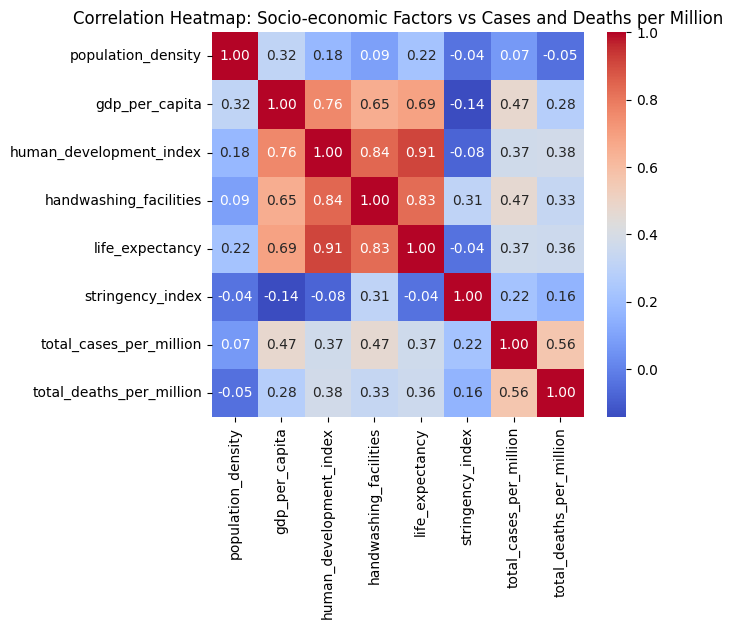

In [28]:
import seaborn as sns

corr = df_max_cases[socio_cols + ['total_cases_per_million', 'total_deaths_per_million']].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap: Socio-economic Factors vs Cases and Deaths per Million')
plt.show()

From this heatmap we can see that cases per million has strong positive correlations with socio-economics factors indicating development (eg GDP per capita and Human Development Index). This could be linked to more developed countries having more capable testing and reporting systems due to better healthcare infrastructure.

Interestingly, both cases and deaths show near-zero correlation with population density, which is surprising due to the intuitive idea that viral transmission would be greater in more densely populated areas. 

Finally, the correlations incolving deaths and consistently weaker than cases, which could indicate that although socio-economic development is strongly correlated with detection, mortality outcomes have a much larger input from other factors such as pre-existing healthconditions. (Perhaps something else to investigate).

Next, I will generate pairplots to see more clearly any linearity, clustering or other trends. 

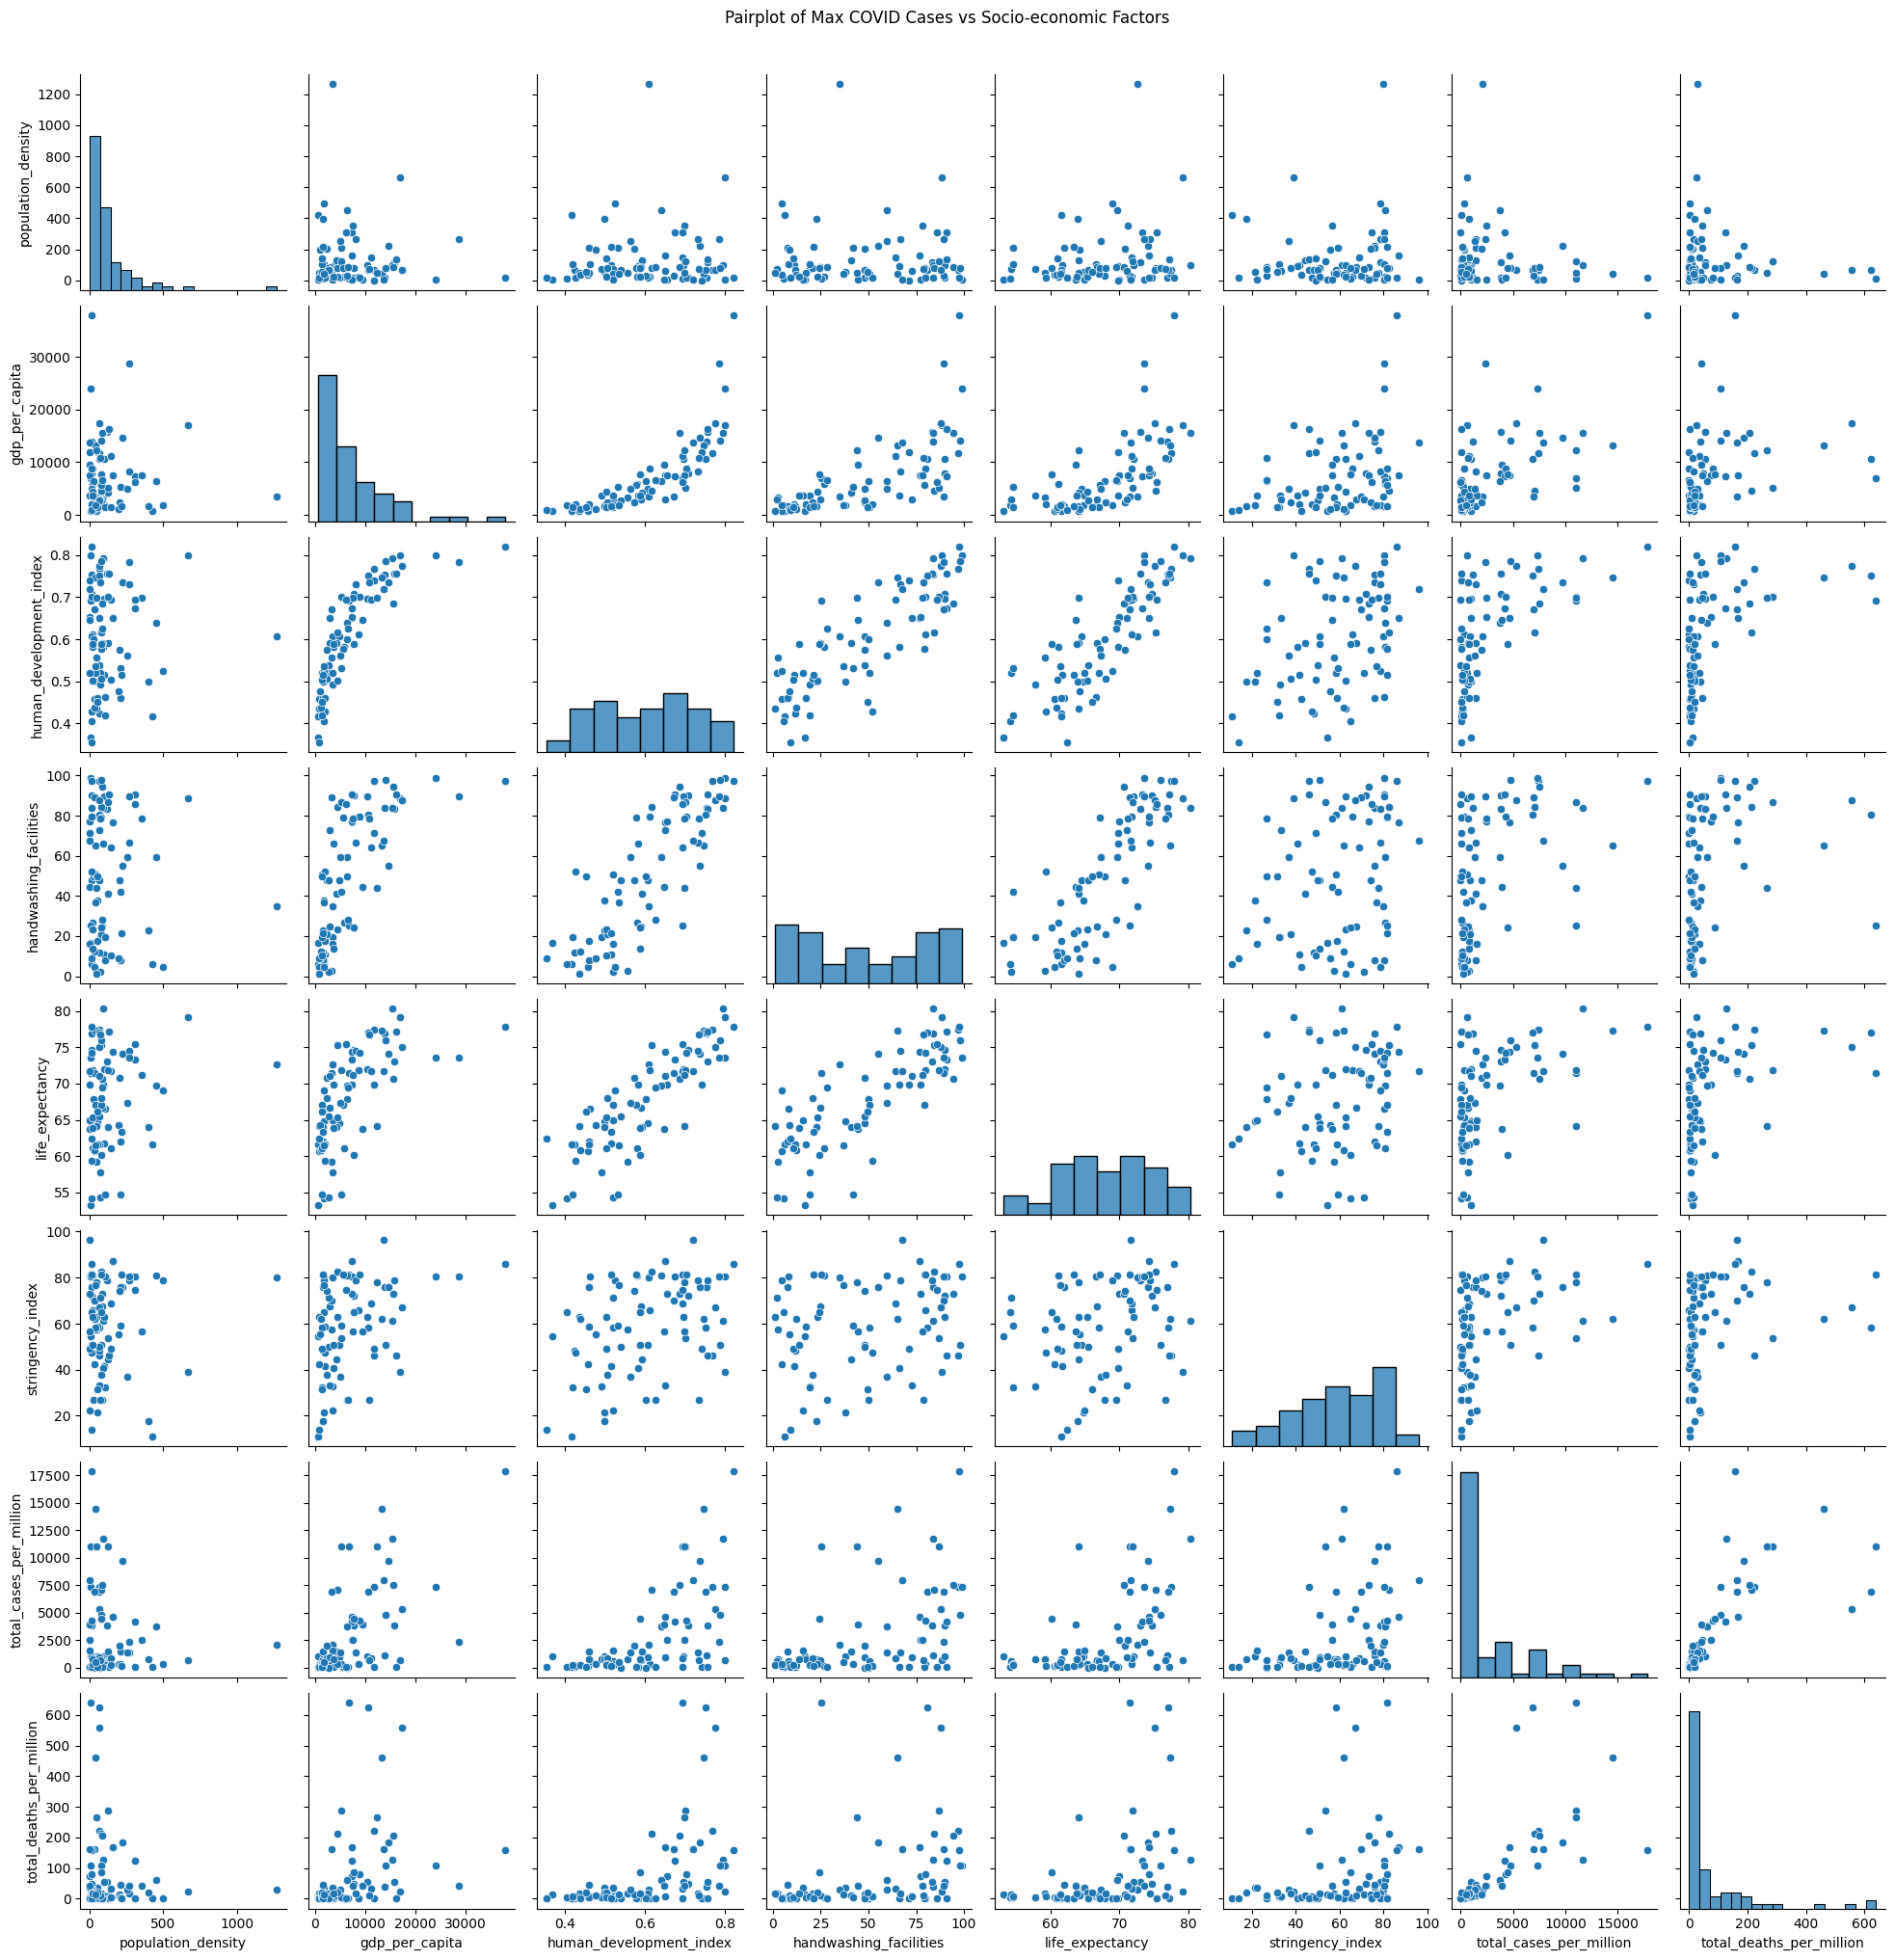

In [29]:
sns.pairplot(df_max_cases[socio_cols + ['total_cases_per_million', 'total_deaths_per_million']].dropna())
plt.suptitle('Pairplot of Max COVID Cases vs Socio-economic Factors', y=1.02)
plt.show()

I am going to next focus on investigating population density against cases per million, as I was surpirsed by its low correlation earlier.

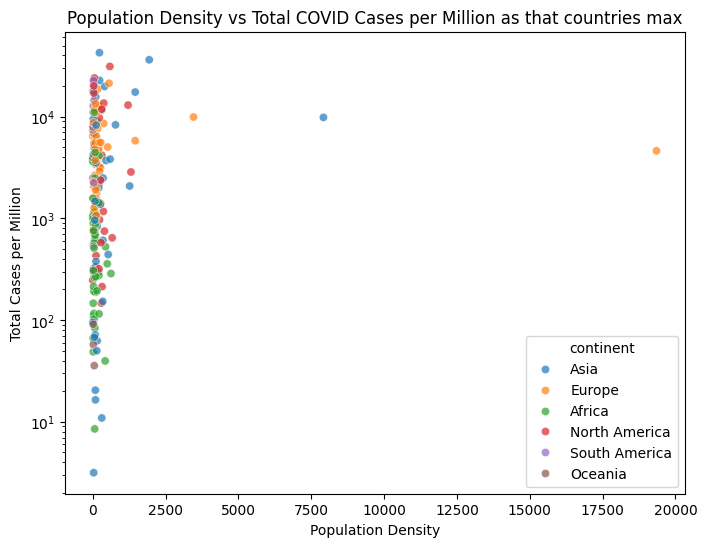

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_max_cases, x='population_density', y='total_cases_per_million', hue='continent', alpha=0.7)
plt.title('Population Density vs Total COVID Cases per Million as that countries max')
plt.xlabel('Population Density')
plt.ylabel('Total Cases per Million')
plt.yscale('log') 
plt.show()

At the current scale there are some anomalies in population density (notably like Singapore and Monaco) dominating the graph. Although these are not invalid, I am going to remove the top 2% densest populations to see if there is more information hiding in this relationship.

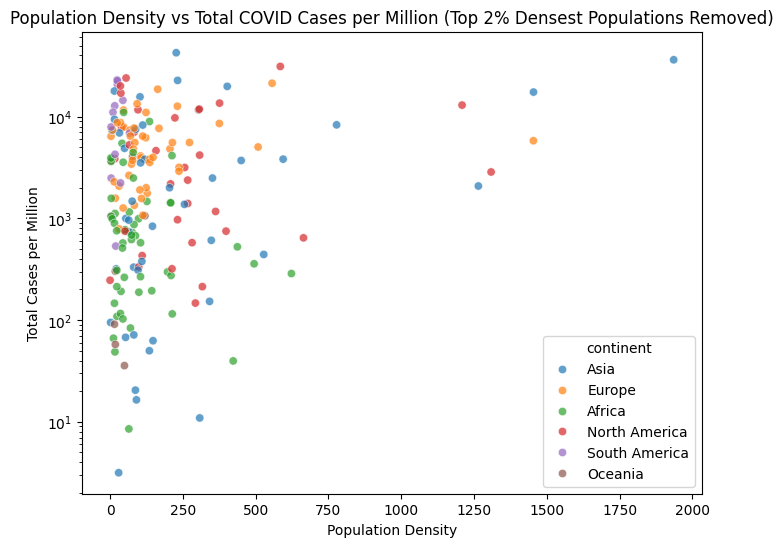

In [31]:
population_density_max = df_max_cases['population_density'].quantile(0.98)
df_filtered = df_max_cases[df_max_cases['population_density'] <= population_density_max]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_filtered, x='population_density', y='total_cases_per_million', hue='continent', alpha=0.7)
plt.title('Population Density vs Total COVID Cases per Million (Top 2% Densest Populations Removed)')
plt.xlabel('Population Density')
plt.ylabel('Total Cases per Million')
plt.yscale('log') 
plt.show()

This new graph shows much more clearly that there is a relationship. Countries with particularly high populations have a higher cases rate. I would say this is a curve shape, but more analysis would need to be done to confirm this.
